In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Import datasets
df_gdp = pd.read_csv('GDP-2015.csv')
df_le = pd.read_csv('life-expectancy.csv')
df_alcohol = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
df_satisfaction = pd.read_csv('happiness-cantril-ladder.csv')

In [33]:
# Renaming and dropping unnecessary columns
df_gdp = df_gdp.rename(columns = {'Entity' : 'Country'})
df_gdp = df_gdp.drop(columns = ['Code'])

df_le = df_le.rename(columns = {'Entity' : 'Country', 'Life expectancy (years)' : 'Life expectancy'})
df_le = df_le.drop(columns = ['Code'])

df_alcohol = df_alcohol.rename(columns = {'Entity' : 'Country', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' : 'Total alcohol consumption per capita'})
df_alcohol = df_alcohol.drop(columns = ['Code'])
df_alcohol['Year'] = 2016

df_satisfaction = df_satisfaction.rename(columns = {'Entity' : 'Country', 'Life satisfaction in Cantril Ladder (World Happiness Report 2019)' : 'Life satisfaction'})
df_satisfaction = df_satisfaction.drop(columns = ['Code'])

In [34]:
# Merge and rework data
df_2015 = pd.merge(df_gdp, df_le)
df_2015["GDP per capita"] = np.log10(df_2015["GDP per capita"])

df_alcsat = pd.merge(df_alcohol, df_satisfaction)

         Country  Total alcohol consumption per capita  Year  \
0    Afghanistan                                   0.2  2016   
1        Albania                                   7.5  2016   
2        Algeria                                   0.9  2016   
3      Argentina                                   9.8  2016   
4        Armenia                                   5.5  2016   
..           ...                                   ...   ...   
131    Venezuela                                   5.6  2016   
132      Vietnam                                   8.3  2016   
133        Yemen                                   0.1  2016   
134       Zambia                                   4.8  2016   
135     Zimbabwe                                   4.8  2016   

     Life satisfaction  
0             4.220169  
1             4.511101  
2             5.340854  
3             6.427221  
4             4.325472  
..                 ...  
131           4.041115  
132           5.062267  
133   

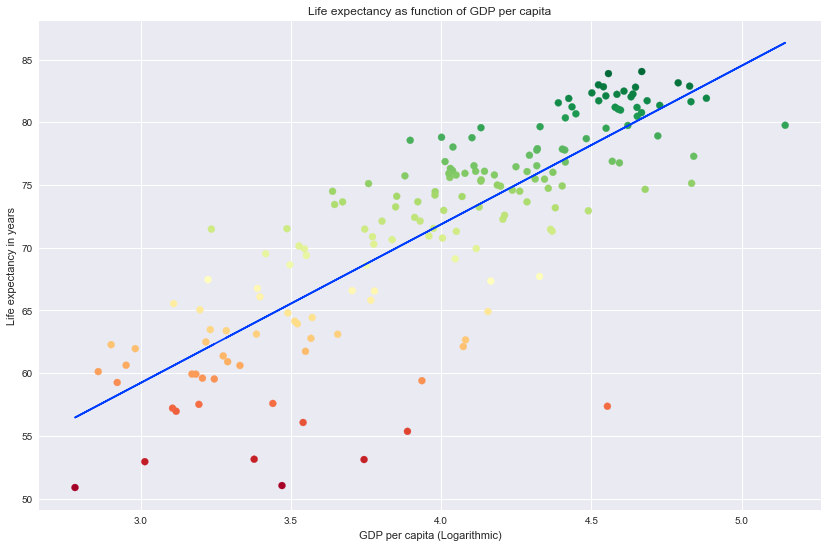

In [63]:
# Map data to x, y values and create regression line
x = df_2015["GDP per capita"]
y = df_2015["Life expectancy"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_2015["Life expectancy"], cmap="RdYlGn")

# Create title and labels
plt.title('Life expectancy as function of GDP per capita')
plt.xlabel('GDP per capita (Logarithmic)')
plt.ylabel('Life expectancy in years')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()

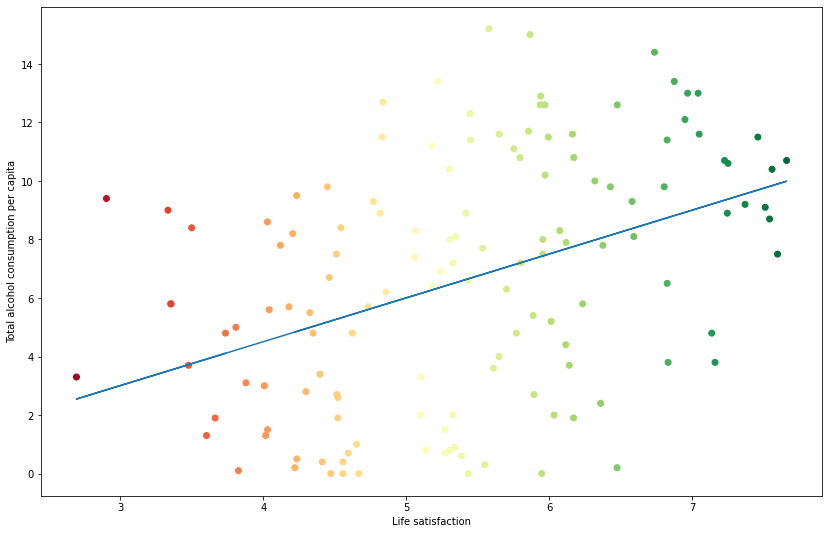

In [38]:
# Map data to x, y values and create regression line
x = df_alcsat["Life satisfaction"]
y = df_alcsat["Total alcohol consumption per capita"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_alcsat["Life satisfaction"], cmap="RdYlGn")

# Create title and labels
plt.title('')
plt.xlabel('Life satisfaction')
plt.ylabel('Total alcohol consumption per capita')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()